In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from google.colab import files 
import io

In [2]:
uploaded = files.upload()

Saving data.csv to data.csv


In [15]:
df = pd.read_csv('data.csv')

### Basic Data Exploration and Visualization

In [4]:
df.head()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   process.b1.capacity  2043 non-null   int64  
 1   process.b2.capacity  2043 non-null   int64  
 2   process.b3.capacity  2043 non-null   int64  
 3   process.b4.capacity  2043 non-null   int64  
 4   property.price       2043 non-null   int64  
 5   property.product     2043 non-null   int64  
 6   property.winner      2043 non-null   int64  
 7   verification.result  2043 non-null   bool   
 8   verification.time    2043 non-null   float64
dtypes: bool(1), float64(1), int64(7)
memory usage: 129.8 KB


In [17]:
df.shape

(2043, 9)

In [18]:
df.describe()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time
count,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000
mean,1.000000,2.093979,1.883994,0.587861,71.473324,3.252080,0.455213,7336.944574
std,0.816696,0.811269,0.320310,0.492340,8.048740,1.804225,1.062828,10375.393650
min,0.000000,0.000000,1.000000,0.000000,59.000000,1.000000,0.000000,77.916667
25%,0.000000,1.000000,2.000000,0.000000,65.000000,2.000000,0.000000,546.818910
50%,1.000000,2.000000,2.000000,1.000000,70.000000,3.000000,0.000000,1316.983333
75%,2.000000,3.000000,2.000000,1.000000,78.000000,5.000000,0.000000,10876.638889
max,2.000000,3.000000,2.000000,1.000000,90.000000,6.000000,4.000000,44130.520833


In [19]:
df.columns

Index(['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity',
       'process.b4.capacity', 'property.price', 'property.product',
       'property.winner', 'verification.result', 'verification.time'],
      dtype='object')

In [20]:
df.corr()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
process.b1.capacity,1.000000,0.084260,0.443671,-0.052370,0.285558,0.068131,-0.121864,-0.120126,0.398359
process.b2.capacity,0.084260,1.000000,-0.025869,-0.069726,0.035033,-0.099167,-0.049640,-0.044442,0.042732
process.b3.capacity,0.443671,-0.025869,1.000000,-0.079735,0.189417,-0.022250,-0.096544,-0.071344,0.240032
process.b4.capacity,-0.052370,-0.069726,-0.079735,1.000000,0.098808,0.118117,0.105088,0.008864,0.044963
property.price,0.285558,0.035033,0.189417,0.098808,1.000000,-0.019990,0.222108,0.211760,0.078056
property.product,0.068131,-0.099167,-0.022250,0.118117,-0.019990,1.000000,0.066033,0.036485,-0.416841
property.winner,-0.121864,-0.049640,-0.096544,0.105088,0.222108,0.066033,1.000000,0.214558,-0.104274
verification.result,-0.120126,-0.044442,-0.071344,0.008864,0.211760,0.036485,0.214558,1.000000,-0.232090
verification.time,0.398359,0.042732,0.240032,0.044963,0.078056,-0.416841,-0.104274,-0.232090,1.000000


In [21]:
df.dtypes

process.b1.capacity      int64
process.b2.capacity      int64
process.b3.capacity      int64
process.b4.capacity      int64
property.price           int64
property.product         int64
property.winner          int64
verification.result       bool
verification.time      float64
dtype: object

# KNN Classification Algorithm

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()
X_train = X_train.apply(le.fit_transform)

In [27]:
X_train.head()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time
1793,2,3,1,0,2,5,0,566
807,1,1,1,1,20,2,0,774
1870,2,3,1,0,20,5,0,599
1655,2,2,1,1,4,5,0,840
906,1,2,1,0,15,1,0,1287


In [29]:
Xtr = X_train
Xtr.shape 

(1430, 8)

In [30]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean')

In [32]:
le = LabelEncoder()
X_test = X_test.apply(le.fit_transform)

Xtr1 = X_test 
Xtr1.shape 

(613, 8)

In [33]:
y_pred = knn.predict(Xtr1)

In [34]:
confusion_matrix(y_test, y_pred)

array([[464,  85],
       [ 16,  48]])

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test, y_pred)

0.835236541598695

In [37]:
from sklearn.metrics import precision_score

In [40]:
precision_score(y_test, y_pred)

0.3609022556390977

In [43]:
from sklearn.metrics import recall_score

In [45]:
recall_score(y_test, y_pred)

0.75

In [47]:
from sklearn.metrics import f1_score

In [48]:
f1_score(y_test, y_pred)

0.4873096446700507

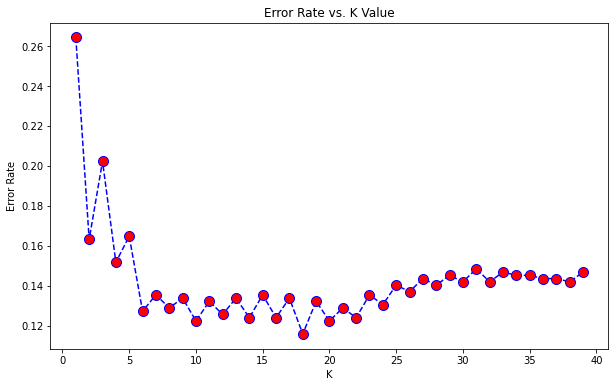

Minimum error:- 0.11582381729200653 at K = 18


In [49]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtr,y_train)
 pred_i = knn.predict(Xtr1)
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [50]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [51]:
y_pred = knn.predict(Xtr1)

In [52]:
accuracy_score(y_test, y_pred)

0.7357259380097879

## Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [54]:
X= df.drop(['verification.result'], axis=1)
y= df['verification.result']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [55]:
X.shape

(2043, 8)

In [56]:
y.shape

(2043,)

In [57]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=None)

In [58]:
dt.fit(Xtr,y_train)

DecisionTreeClassifier()

In [59]:
y_pred = dt.predict(Xtr1)

In [60]:
np.sum((y_test == y_pred))/y_test.size

0.7487765089722676

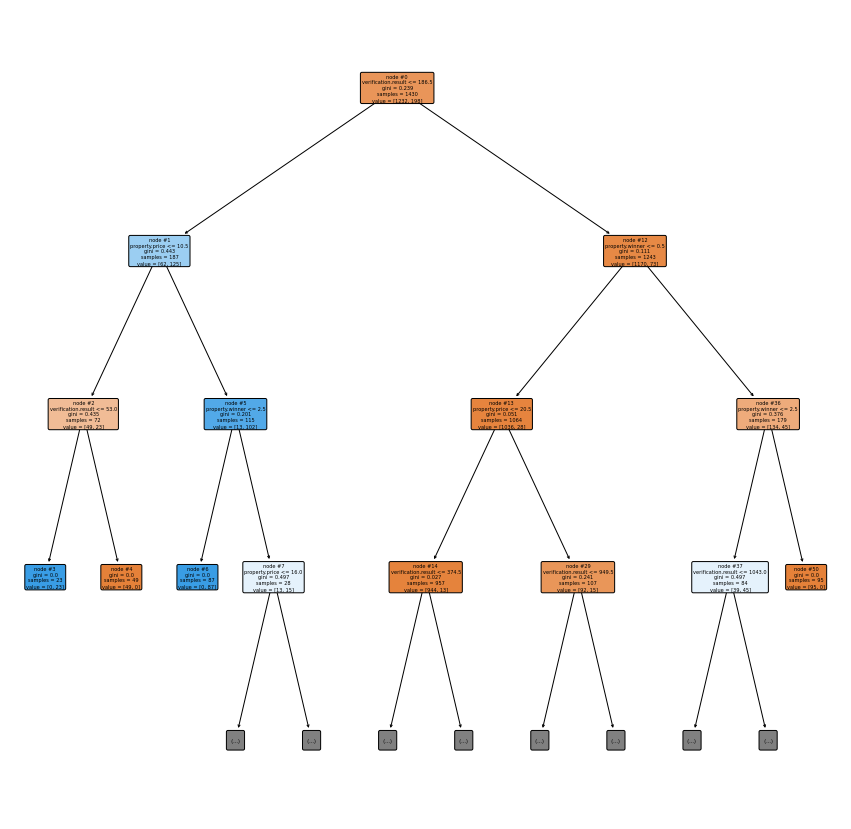

In [64]:
_=plt.figure(figsize=(15,15))
_=plot_tree(
            dt,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['process.b1.capacity'	,'process.b2.capacity'	,'process.b3.capacity'	,'process.b4.capacity'	,'property.price'	,'property.product',	'property.winner'	,'verification.result','verification.time']
            )
            

_=plt.show()


# Random Forest

In [65]:
from sklearn.metrics import mean_squared_error,r2_score 

In [66]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)

RandomForestClassifier()

In [67]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8172920065252854


In [68]:
metrics.confusion_matrix(y_test, y_pred)

array([[437, 112],
       [  0,  64]])

In [71]:
df.feature_names = df[['process.b1.capacity'	,'process.b2.capacity'	,'process.b3.capacity'	,'process.b4.capacity'	,'property.price'	,'property.product',	'property.winner'	,'verification.time']]
df.target_names = df['verification.result']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [72]:
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

7    0.481349
6    0.194294
4    0.178268
5    0.064514
0    0.032043
1    0.024694
3    0.017593
2    0.007247
dtype: float64

In [73]:
list(zip(df.columns, feature_imp))

[('process.b1.capacity', 0.4813487815115263),
 ('process.b2.capacity', 0.19429350414886737),
 ('process.b3.capacity', 0.17826796410844614),
 ('process.b4.capacity', 0.06451378785343514),
 ('property.price', 0.032042704523174745),
 ('property.product', 0.024693556057689595),
 ('property.winner', 0.017592686560410995),
 ('verification.result', 0.0072470152364497165)]

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No handles with labels found to put in legend.


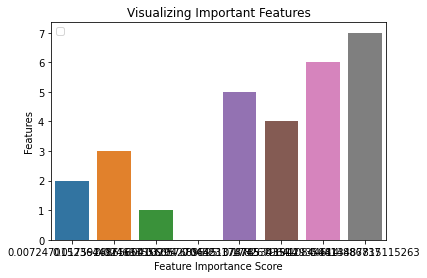

In [74]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [75]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

RandomForestClassifier()

Accuracy: 0.8433931484502447


In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.83      0.90       549
        True       0.40      1.00      0.57        64

    accuracy                           0.84       613
   macro avg       0.70      0.91      0.74       613
weighted avg       0.94      0.84      0.87       613

